In [1]:
# Project packages
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt 
import seaborn as sns

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode

# Machine Learning
from sklearn.metrics import r2_score, make_scorer, mean_squared_error # import metrics from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

import sys
import warnings
from time import time

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [160]:
# Reading in the data
# train_linearregression = pd.read_csv('./Dataset/linearregression_train.csv')
# test_linearregression = pd.read_csv('./Dataset/linearregression_test.csv')
# train_knn = pd.read_csv('./Dataset/knn_train.csv')
# test_knn = pd.read_csv('./Dataset/knn_test.csv')
train_processed = pd.read_csv('./Dataset/processed_train.csv')
test_processed = pd.read_csv('./Dataset/processed_test.csv')

train = train_processed
test = test_processed

test_ID = test['Id']
del test['Id']
del train['Id']

ntrain = train.shape[0]
# vali = train[0:int(0.1*ntrain)]
# train = train[int(0.1*ntrain):]
# print(ntrain)
# print(vali.shape)
# print(train.shape)

In [3]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
145,6.878326,6.606650,0.0,1,3,4,3,0.000000,0.0,6,...,0,0,0,0,1,0,1,1,0,11.775297
146,6.775366,0.000000,0.0,1,2,4,3,5.347108,0.0,1,...,0,0,0,0,1,0,1,1,0,11.561725
147,6.785588,7.049255,0.0,1,3,4,3,0.000000,0.0,6,...,0,0,0,0,1,0,1,1,0,12.312687
148,6.985642,0.000000,0.0,1,3,4,3,6.523562,0.0,2,...,0,0,0,0,1,0,1,1,0,11.856522
149,6.799056,6.107023,0.0,1,3,4,3,0.000000,0.0,6,...,0,0,0,0,1,0,1,1,0,11.652696


In [4]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.799056,0.000000,0.0,1,2,4,3,6.150603,4.976734,5,...,0,0,0,0,0,1,0,1,1,0
1,7.192934,0.000000,0.0,1,3,4,3,6.828712,0.000000,0,...,0,0,0,0,0,1,0,1,1,0
2,6.834109,6.553933,0.0,1,3,4,3,6.674561,0.000000,2,...,0,0,0,0,0,1,0,1,1,0
3,6.831954,6.520621,0.0,1,3,4,3,6.401917,0.000000,2,...,0,0,0,0,0,1,0,1,1,0
4,7.155396,0.000000,0.0,1,2,4,3,5.575949,0.000000,0,...,0,0,0,0,0,1,0,1,1,0


In [161]:
Y_train = train['SalePrice'].copy()
X_train = train.copy()
Y_vali = vali['SalePrice'].copy()
X_vali = vali.copy()
X_train.drop(['SalePrice'], axis=1, inplace=True)
X_test = test
X_vali.drop(['SalePrice'], axis=1, inplace=True)
X_vali = test

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

# Tree Methods #

## (i) Regression Tree ##

Text(0,0.5,'Rmse')

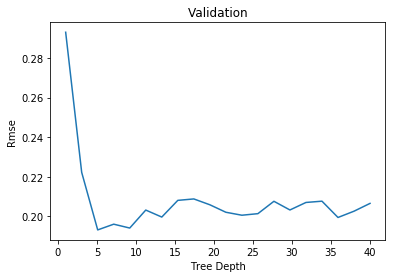

In [6]:
depths = np.linspace(1, 40, num=20)

cv_dtr = [rmse_cv(DTR(max_depth = depth)).mean() for depth in depths]

# Plot findings
cv_dtrs = pd.Series(cv_dtr, index = depths)
cv_dtrs.plot(title = "Validation")
plt.xlabel("Tree Depth")
plt.ylabel("Rmse")

Text(0,0.5,'Rmse')

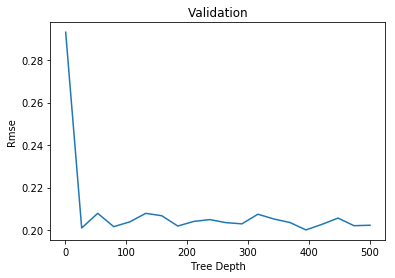

In [8]:
depths = np.linspace(1, 500, num=20)

cv_dtr = [rmse_cv(DTR(max_depth = depth)).mean() for depth in depths]

# Plot findings
cv_dtrs = pd.Series(cv_dtr, index = depths)
cv_dtrs.plot(title = "Validation")
plt.xlabel("Tree Depth")
plt.ylabel("Rmse")

Text(0,0.5,'Rmse')

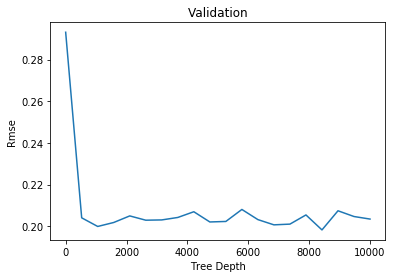

In [9]:
depths = np.linspace(1, 10000, num=20)

cv_dtr = [rmse_cv(DTR(max_depth = depth)).mean() for depth in depths]

# Plot findings
cv_dtrs = pd.Series(cv_dtr, index = depths)
cv_dtrs.plot(title = "Validation")
plt.xlabel("Tree Depth")
plt.ylabel("Rmse")

In [10]:
cv_dtr = cv_dtrs.min()
model_dtr = DTR(max_depth = cv_dtrs.argmin())
print('The RMSE of Regression Tree is: \n {:.6f}'. format(cv_dtr))

The RMSE of Regression Tree is: 
 0.198237


In [11]:
dtr_5 = DTR(max_depth = 5).fit(X_train, Y_train)

In [12]:
predict_dtr_5 = dtr_5.predict(X_train)
predict_dtr_5.sort(axis=0)
predict_dtr_5 = list(predict_dtr_5)
predict_dtr_5 = np.unique(predict_dtr_5)

print('The unique values in the prediction are: ', predict_dtr_5.shape[0])
print('The number of unique values is: \n', predict_dtr_5)

The unique values in the prediction are:  32
The number of unique values is: 
 [11.06724159 11.13938232 11.45352436 11.49889548 11.57530272 11.5996676
 11.66382631 11.70297268 11.74825145 11.84694382 11.8794988  11.90604049
 11.91788036 11.92320668 11.9686565  12.05104338 12.14721091 12.18685766
 12.23548536 12.26621732 12.30380666 12.32353872 12.44853337 12.48686975
 12.52422398 12.58744067 12.65979666 12.70906839 12.75828835 12.95214386
 13.16709436 13.46704124]


Note that $2^5=32$. 

## (ii) Random Forest / Boostrap ##

In [13]:
cv_rf_defult = rmse_cv(RFR()).mean()
print('The RMSE of Random Forest is: \n {:.6f}'. format(cv_rf_defult))

The RMSE of Random Forest is: 
 0.145111


In [14]:
# # Tune the parameters of Random Forest
# start = time() # Get start time

# rf_regressor = RFR(random_state=42)
# cv_sets = ShuffleSplit(random_state = 4) # shuffling our data for cross-validation
# parameters = {'n_estimators':[100, 200, 400], 
#               'min_samples_leaf':[2], 
#               'max_depth':[40, 60, 80]}
# scorer = make_scorer(r2_score)
# n_iter_search = 8
# grid_obj = RandomizedSearchCV(rf_regressor, 
#                               parameters, 
#                               n_iter = n_iter_search, 
#                               scoring = scorer, 
#                               cv = cv_sets,
#                               random_state= 99)
# grid_fit = grid_obj.fit(X_train, Y_train)
# rf_opt = grid_fit.best_estimator_

# end = time() # Get end time
# # Calculate training time
# rf_time = (end-start)/60
# print('It took {0:.2f} minutes for RandomSearchCV to converge to optimised parameters for the RF model'.format(rf_time))

In [63]:
rf_opt = RFR(n_estimators=400, 
             min_samples_leaf=2, 
             max_depth=60)

model_rf = rf_opt

#print('The best parameters for Random Forest is: \n', grid_fit.best_params_)

In [64]:
cv_rf_best = rmse_cv(rf_opt).mean()
cv_rf = cv_rf_best
print('The RMSE of Random Forest after tunning is: \n {:.6f}'. format(cv_rf_best))

The RMSE of Random Forest after tunning is: 
 0.134653


In [17]:
# importances = rf_opt.feature_importances_
# X_train.columns.values[(np.argsort(importances)[::-1])[:5]] # the top 5 features

## (iii) Gradiant Boosting Tree / Boosting ##

In [57]:
# Initiating Gradient Boosting Regressor
model_gbr = GBR(n_estimators=3000, 
                learning_rate=0.05,
                max_depth=4, 
                max_features='sqrt',
                min_samples_leaf=15, 
                min_samples_split=10, 
                loss='huber',
                random_state=5)

cv_gbr = rmse_cv(model_gbr).mean()

In [58]:
print('The RMSE of Gradiant Boosting Tree is: \n {:.6f}'. format(cv_gbr))

The RMSE of Gradiant Boosting Tree is: 
 0.115121


# Summary for Tree methods #

In [125]:
# model_ridge = make_pipeline(RobustScaler(), Ridge(alpha = 4))
# model_lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005))
# model_elastic = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005))
# model_krr = make_pipeline(RobustScaler(), KernelRidge(alpha=6, kernel='polynomial', degree=2.65, coef0=6.9))

model_ridge = make_pipeline(RobustScaler(), Ridge(alpha = 4))
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005))
model_elastic = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio=0.6))
model_krr = make_pipeline(RobustScaler(), KernelRidge(alpha=6, kernel='polynomial', degree=2.65, coef0=6.9))

In [162]:
# X_test = X_vali
# Y_test = Y_vali

model_dtr.fit(X_train, Y_train)
dtr_train = np.expm1(model_dtr.predict(X_train))
dtr_pred = np.expm1(model_dtr.predict(X_test))

model_rf.fit(X_train, Y_train)
rf_train = np.expm1(model_rf.predict(X_train))
rf_pred = np.expm1(model_rf.predict(X_test))

model_gbr.fit(X_train, Y_train)
gbr_train = np.expm1(model_gbr.predict(X_train))
gbr_pred = np.expm1(model_gbr.predict(X_test))

model_ridge.fit(X_train, Y_train)
ridge_train = np.expm1(model_ridge.predict(X_train))
ridge_pred = np.expm1(model_ridge.predict(X_test))

model_lasso.fit(X_train, Y_train)
lasso_train = np.expm1(model_lasso.predict(X_train))
lasso_pred = np.expm1(model_lasso.predict(X_test))

model_elastic.fit(X_train, Y_train)
elastic_train = np.expm1(model_elastic.predict(X_train))
elastic_pred = np.expm1(model_elastic.predict(X_test))

model_krr.fit(X_train, Y_train)
krr_train = np.expm1(model_krr.predict(X_train))
krr_pred = np.expm1(model_krr.predict(X_test))

Y_train_real = np.expm1(Y_train)

In [163]:
cv_dtr = rmse_cv(model_dtr).mean()
cv_rf = rmse_cv(model_rf).mean()
cv_gbr = rmse_cv(model_gbr).mean()
cv_ridge = rmse_cv(model_ridge).mean()
cv_lasso = rmse_cv(model_lasso).mean()
cv_elastic = rmse_cv(model_elastic).mean()
cv_krr = rmse_cv(model_krr).mean()

In [164]:
results = pd.DataFrame({
    'Model': ['Ridge',
              'Lasso',
              'ElasticNet',
              'Kernel Ridge',
              'Random Forest',
              'Regression Tree',
              'Gradient Boosting Regressor',
              ],
    'Score': [cv_ridge,
              cv_lasso,
              cv_elastic,
              cv_krr,
              cv_rf,
              cv_dtr,
              cv_gbr,
              ]})

In [165]:
models_train = pd.DataFrame({'dtr_train': dtr_train[:],
                             'rf_train': rf_train[:],
                             'gbr_train': gbr_train[:],
                             'ridge_train': ridge_train[:],
                             'lasso_train': lasso_train[:],
                             'elastic_train': elastic_train[:],
                             'krr_train': krr_train[:],
                            })
models_pred = pd.DataFrame({'dtr_pred': dtr_pred[:],
                            'rf_pred': rf_pred[:],
                            'gbr_pred': gbr_pred[:],
                            'ridge_pred': ridge_pred[:],
                            'lasso_pred': lasso_pred[:],
                            'elastic_pred': elastic_pred[:],
                            'krr_pred': krr_pred[:],
                           })

   index                        Model     Score
0      2                   ElasticNet  0.109317
1      1                        Lasso  0.109476
2      3                 Kernel Ridge  0.110394
3      0                        Ridge  0.110708
4      6  Gradient Boosting Regressor  0.113996
5      4                Random Forest  0.135156
6      5              Regression Tree  0.195859


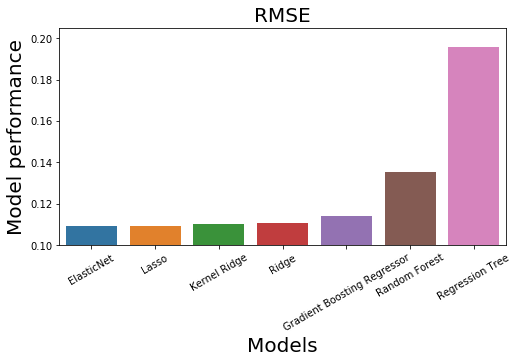

In [166]:
result_df = results.sort_values(by='Score', ascending=True).reset_index()
print(result_df)
# Plotting model performance
f, ax = plt.subplots(figsize=(8,4))
plt.xticks(rotation='30')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=20)
plt.ylabel('Model performance', fontsize=20)
plt.ylim(0.10, 0.205)
plt.title('RMSE', fontsize=20)
plt.show()

# Ensembel Methods #

In [167]:
Y_train_real = np.expm1(Y_train)
Y_train_real.head()

del models_train['dtr_train']
del models_pred['dtr_pred']

In [159]:
# def vali_rmse(Y_vali_pred):
#     Y_vali_pred = np.log1p(Y_vali_pred)
#     d = Y_vali_pred - Y_vali
#     rmse = d.multiply(d)
#     rmse = rmse.mean()
#     rmse = np.sqrt(rmse)
#     return rmse

## (i) Averaging ##

In [168]:
ensembel_avg_pred = models_pred.mean(axis=1)

In [150]:
ensembel_avg_rmse = vali_rmse(ensembel_avg_pred)
print(ensembel_avg_rmse) #0.1054

0.10693031820565584


In [169]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensembel_avg_pred
sub.to_csv('ensembel_avg_pred.csv',index=False)

In [33]:
np.log1p(models_train).head()

,rf_train,gbr_train,ridge_train,lasso_train,elastic_train,krr_train
0,11.878666,11.747652,11.803138,11.826015,11.813651,11.785688
1,11.549552,11.557721,11.638539,11.612528,11.623831,11.597797
2,12.306293,12.313851,12.270218,12.280685,12.280445,12.279055
3,11.933487,11.856053,11.906585,11.903861,11.904315,11.863957
4,11.632542,11.626539,11.677371,11.647599,11.661208,11.636220


## (ii) Linear Regression ##

In [170]:
ensembel_lin = ElasticNet(alpha = 0.01)
ensembel_lin.fit(np.log1p(models_train), np.log1p(Y_train_real))
ensembel_lin_pred = ensembel_lin.predict(models_pred)
print('The coefficent of Linear ensembel is: \n', ensembel_lin.coef_)
ensembel_lin.coef_.sum()

The coefficent of Linear ensembel is: 
 [0.35549246 0.46146991 0.05017025 0.         0.02244067 0.1000589 ]


0.9896321829009634

In [149]:
vali_rmse(ensembel_lin_pred) #0.1165

0.11749832296351842

In [36]:
models_pred.head()

,rf_pred,gbr_pred,ridge_pred,lasso_pred,elastic_pred,krr_pred
0,205571.570341,212239.651923,207635.486341,208293.824406,208395.428060,207166.036818
1,169787.801135,172694.737917,190839.995379,188345.936649,188226.556273,188933.627240
2,212432.634841,211259.974354,217719.164548,218498.282324,217241.222886,216968.712885
3,185885.772926,182551.736192,164957.839568,171848.382104,170827.913002,171161.809409
4,297341.248277,321292.397334,298907.764133,302297.683442,300834.200394,293535.370961


In [171]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensembel_lin_pred
sub.to_csv('ensembel_lin_pred.csv',index=False)

## (iii) Minimum Variance ##

（∑ai2） * （∑bi2） ≥ （∑ai * bi)2

Largrange

# $ a = \frac{1}{\alpha (\frac{1}{\alpha} + \frac{1}{\beta} + \frac{1}{\gamma})} $

# $ Var_{min} = \frac{1}{\frac{1}{\alpha} + \frac{1}{\beta} + \frac{1}{\gamma}} $

In [172]:
def MV_coeff(rmse):
    min_var_coeff = np.zeros([rmse.shape[0]])
    for i in range(rmse.shape[0]):
        min_var_coeff[i] = 1/rmse[i]
    min_var_coeff /= min_var_coeff.sum()
    return min_var_coeff

In [173]:
# RMSEs for dtr, rf, gbr
rmses = np.array([cv_rf, cv_gbr, cv_ridge, cv_lasso, cv_elastic, cv_krr])

In [174]:
ensembel_MV_coeff = MV_coeff(rmses)
ensembel_MV_pred = models_pred.multiply(ensembel_MV_coeff).sum(axis=1)
print('The minimun variance coefficent is: \n', ensembel_MV_coeff)

The minimun variance coefficent is: 
 [0.14081175 0.1669496  0.17190697 0.17384131 0.17409476 0.17239562]


In [175]:
ensembel_MV_coeff.sum()

1.0

In [176]:
vali_rmse(ensembel_MV_pred.head()) #0.1249

0.32807745387657383

In [177]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensembel_MV_pred
sub.to_csv('ensembel_MV_pred.csv',index=False)

## (iv) Meta Model ##